In [5]:
import numpy as np

class AdaptiveLinearNeuron(object):
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
          X : Training vectors, X.shape : [#samples, #features]
          y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []

        # Cost function
        self.cost = []

        for i in range(self.niter):
            output = self.net_input(X)
            errors = y - output
            self.weight[1:] += self.rate * X.T.dot(errors)
            self.weight[0] += self.rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [8]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# learning rate = 0.01
aln1 = AdaptiveLinearNeuron(0.01, 10).fit(X,y)

ax[0].plot(range(1, len(aln1.cost) + 1), np.log10(aln1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaptive Linear Neuron - Learning rate 0.01')

# learning rate = 0.01
aln2 = AdaptiveLinearNeuron(0.0001, 10).fit(X,y)

ax[1].plot(range(1, len(aln2.cost) + 1), aln2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaptive Linear Neuron - Learning rate 0.0001')

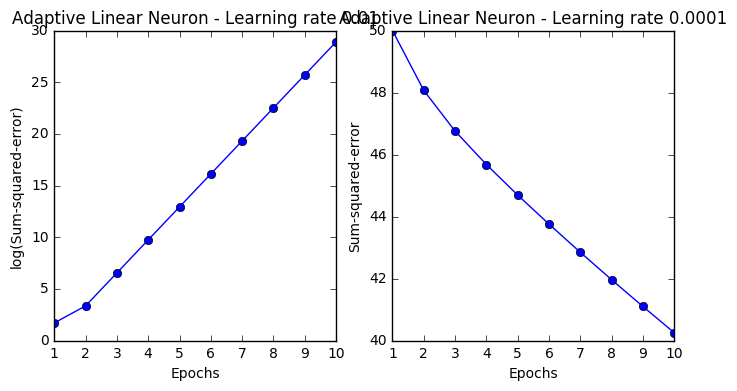

In [9]:
plt.show()